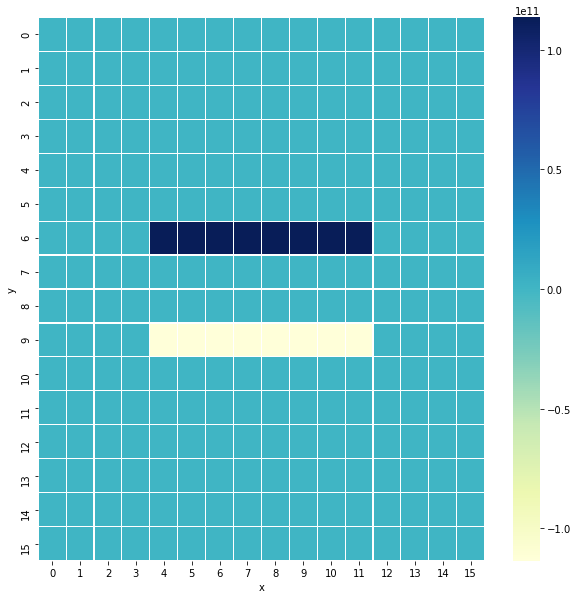

In [13]:
#Import libraries
import numpy as np
import pylab as py
import seaborn as sns
import matplotlib.pyplot as plt

#Variables
N = 16
rho0 = 1
epsilon_0 = 8.8e-12

#Creating domain
x = np.linspace(0,1, N)
y = np.linspace(0,1, N)

#Creating lines of charge
dx = 1/(N-1)
dy = dx
p = np.zeros((N,N))

jmin = int(0.25/dx)+1
jmax = int(0.75/dx)+1
i2 = int(0.6/dy)
i1 = int(0.4/dy)
for j in range(jmin, jmax):
        p[i2, j] = -rho0/epsilon_0
        p[i1, j] = rho0/epsilon_0

ex = dx**(-2)
ey = ex

#Visualizing the lines of charge and the domain
plt.figure (figsize = (10,10))
ax = sns.heatmap(p, linewidth=0.1, cmap = "YlGnBu")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Reindexing
#New rho 
pk = np.zeros ((N*N))
for i in range (N):
    for j in range (N):
        pk [i*N+j] = p [i,j]

#Matrix of coefficients
coef = np.zeros((N**2,N**2))

for k in range (N*N):
    coef [k,k] = -2*(ex+ey)
    if k-1 >= 0:
        coef [k,k-1] = ey
    if k+1 < (N*N):
        coef [k,k+1] = ey
    if k-N >=0 : 
        coef [k,k-N] = ex
    if k+N< (N*N): 
        coef [k,k+N] = ex

In [18]:
def Dirichlet(A):  # ces conditions conduisent à mettre à zéros certains termes de A (qui sont des facteurs des uk concernés)
   for k in range (N*N):
       i,j = k//N,k%N
       # sur le côté gauche i = 0
       if i == 0:
           #facteur de k-N nul
           if k-N>=0:
               A[k,k-N] = 0
       # sur le côté droit i = N-1
       if i == N-1:
           if k+N < N*N:
               A[k,k+N] = 0

       # sur le coté bas j = 0  
       if (j==0):
           if k-1>=0:
               A[k,k-1] = 0
       # sur le côté haut j = N-1
       if j == N-1:
           if k+1<N*N:             
               A[k,k+1] = 0

   return A

coef = Dirichlet(coef)

In [19]:
#Inversion method: Gauss-Seidel zith over-relaxation
#Avec sparse de scipy, recomparer avec Jacobi. Temps de execution: time.time(). Gradient du potentiel np.gradient -> quiver 
grand_u = np.linalg.solve(coef,pk)
'''for k in range(N**2):
    i = k//N
    j = k%N'''
pot_u = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        pot_u[i,j] = grand_u[i*N+j]
    
'''u_new = np.zeros(N*N)
error = np.zeros(N*N)

condition = True
while (condition):
    for i in range (N*N):
        sum1 = 0
        sum2 = 0
        for j in range (N*N):
                if j < i:
                    sum1 += coef[i,j]*u_new[j] 
                if j > i: 
                    sum2 += coef[i,j]*u_old[j] 
        u_new[i] = (((1-w)*u_old[i]) + (w/coef[i,i])*(pk[i] - sum1- sum2))
        error[i] = u_new[i]-u_old[i]
        u_old[i] = u_new[i]
    if max(error) < 100000:
        condition = False
print(u_new)'''

'u_new = np.zeros(N*N)\nerror = np.zeros(N*N)\n\ncondition = True\nwhile (condition):\n    for i in range (N*N):\n        sum1 = 0\n        sum2 = 0\n        for j in range (N*N):\n                if j < i:\n                    sum1 += coef[i,j]*u_new[j] \n                if j > i: \n                    sum2 += coef[i,j]*u_old[j] \n        u_new[i] = (((1-w)*u_old[i]) + (w/coef[i,i])*(pk[i] - sum1- sum2))\n        error[i] = u_new[i]-u_old[i]\n        u_old[i] = u_new[i]\n    if max(error) < 100000:\n        condition = False\nprint(u_new)'

Text(0.5, 1.0, '$\\nabla^2 u = -\\rho/\\epsilon_0$')

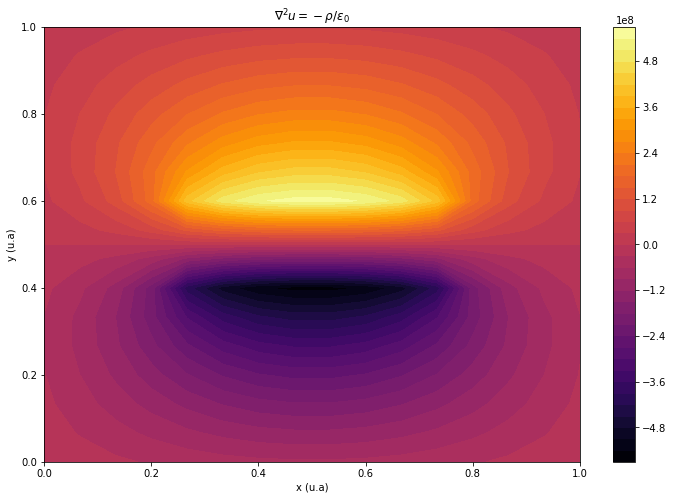

In [20]:
py.figure(figsize = (12,8))
py.contourf(x,y,pot_u, 40, cmap = 'inferno')
py.colorbar()
py.xlabel('x (u.a)')
py.ylabel('y (u.a)')
py.title(r'$\nabla^2 u = -\rho/\epsilon_0$')

In [10]:
#Inversion method: Gauss-Seidel zith over-relaxation\n
w = 1
u_old = np.zeros((2,1))
u_new = np.zeros((2,1))
condition = True
A = np.array([[2, 2],
            [1,3]])
B = np.array([8,8])
w = 1
for h in range (100):
    for i in range (2):
        sum1 = 0
        sum2 = 0
        for j in range (2):
            if j < i:
                sum1 += A[i,j]*u_new[j]
            if j > i:
                sum2 += A[i,j]*u_old[j] 
            u_new[i] = (1-w)*u_old[i] + (w/A[i,i])*(B[i]-sum1-sum2)
            u_old[i] = u_new[i]
        if max(error) < 0.00001:
            condition = False
print(u_new)

[[2.]
 [2.]]
